In [46]:
import matplotlib.pyplot as plt
import numpy as np

def euler(yi, ti, dt, derivs): # Euler method y_i -> y_i+1
    yiplus1 = yi + derivs(yi,ti) * dt
    return yiplus1

def decaylaw( y, time): # calc differentials
    diff0 = -y[0] / taupi
    diff1 = -y[1] / taumu + y[0] / taupi
    diff2 = +y[1] / taumu
    return np.array([diff0, diff1,diff2])

Npi = 1000             # pion number
Nmu = 0                # muon number
Nel = 0                # muon number
taupi = 26.0           # lifetime of pion (ns)
taumu = 2197.0         # lifetime of muon (ns)
dt = 1.                # size of time interval (ns)
N = 1000               # time range (ns)
probpi = dt/taupi      # pi decay probability in interval dt
probmu = dt/taumu      # mu decay probability in interval dt

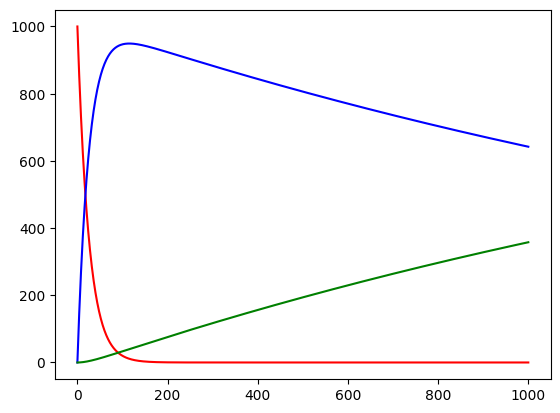

In [47]:
t = np.linspace(0, N, N) # Nx1 evenly spaced t_i time array
y = np.zeros([N,3]) # Nx2 array (N rows, 2 columns) for y_i, v_i state
y[0,0] = Npi
y[0,1] = Nmu
y[0,2] = Nel

for j in range(N-1): # Loop over steps
    y[j+1] = euler(y[j], t[j], dt, decaylaw)

N1 = y[:,0]
N2 = y[:,1]
N3 = y[:,2]

plt.plot(t,N1,"r")
plt.plot(t,N2,"b")
plt.plot(t,N3,"g")

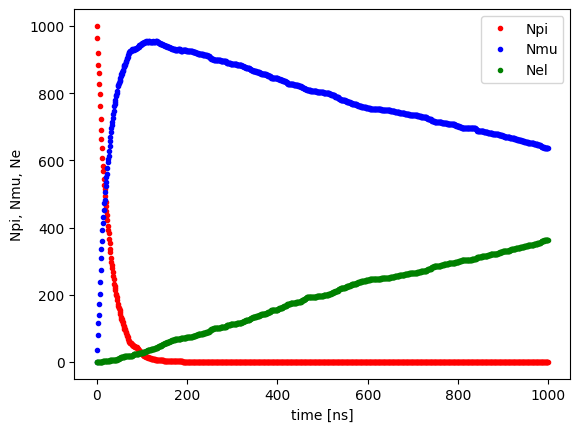

In [48]:
time = np.arange(0,N,dt,dtype=int)
Np, Nm, Ne  = np.zeros(N), np.zeros(N), np.zeros(N)

for it in time: # loop over time steps
    Np[it], Nm[it], Ne[it] = Npi, Nmu, Nel

    Npidcy,Nmudcy = 0,0
    for ip in range(Npi): # loop over surviving pions
        if np.random.ranf() < probpi:
            Npidcy += 1
    for im in range(Nmu): # loop over surviving muons
        if np.random.ranf() < probmu:
            Nmudcy += 1

    Npi -= Npidcy
    Nmu += Npidcy
    Nmu -= Nmudcy
    Nel += Nmudcy

plt.plot(time,Np,"r.",label="Npi")
plt.plot(time,Nm,"b.",label="Nmu")
plt.plot(time,Ne,"g.",label="Nel")
plt.xlabel("time [ns]")
plt.ylabel("Npi, Nmu, Ne")
plt.legend()

(0.0, 500.0)

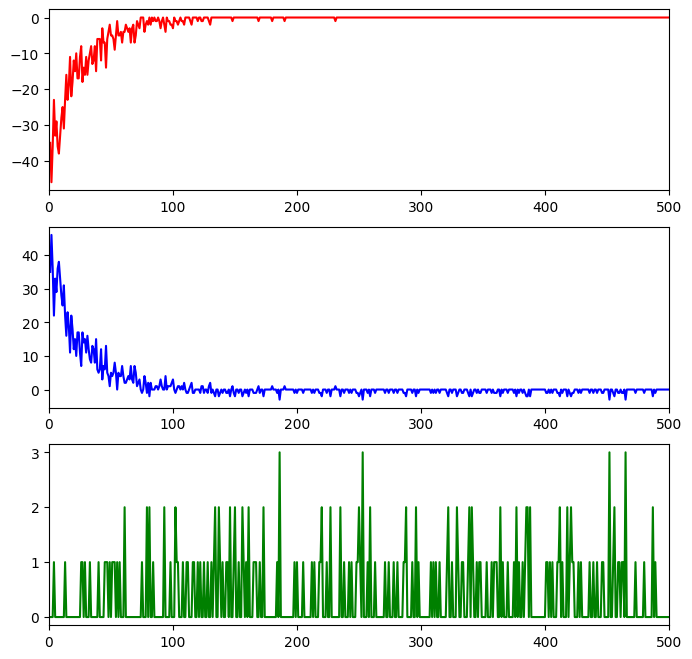

In [49]:
fig, axs = plt.subplots( 3, 1, figsize=(8, 8))

axs[0].plot(time[1:], Np[1:]-Np[:-1], "r",label="Npi")
axs[1].plot(time[1:], Nm[1:]-Nm[:-1], "b",label="Nmu")
axs[2].plot(time[1:], Ne[1:]-Ne[:-1], "g",label="Nel")
axs[0].set_xlim(0,500)
axs[1].set_xlim(0,500)
axs[2].set_xlim(0,500)